##  Load the Dataset
First, load the dataset into a pandas DataFrame.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis




# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')


In [41]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [42]:
df.head

<bound method NDFrame.head of              uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Cl

In [43]:
df.shape

(2443651, 9)

In [44]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [45]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')]

In [46]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [47]:
df.columns = df.columns.str.strip()  # Removes leading and trailing spaces
print(df.columns)


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [49]:
# Example: if the correct column name is 'category'
df.rename(columns={'category': 'product_category'}, inplace=True)


### Part 1: Understanding Product Categories

## Generate a Frequency Table for Product Categories
 Calculate the frequency of each product category.

In [50]:
category_freq = df['product_category'].value_counts()


In [51]:
# Frequency table for product categories
category_freq = df['product_category'].value_counts()
print(category_freq)


Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: product_category, Length: 296, dtype: int64


 Identify Top 5 Most Listed Product Categories
Extract the top 5 categories.

In [52]:
top_5_categories = category_freq.head(5)
print(top_5_categories)


Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: product_category, dtype: int64


**Visualizations**

Visualize the Distribution of Product Categories
Create a bar chart to show the distribution of products across categories.

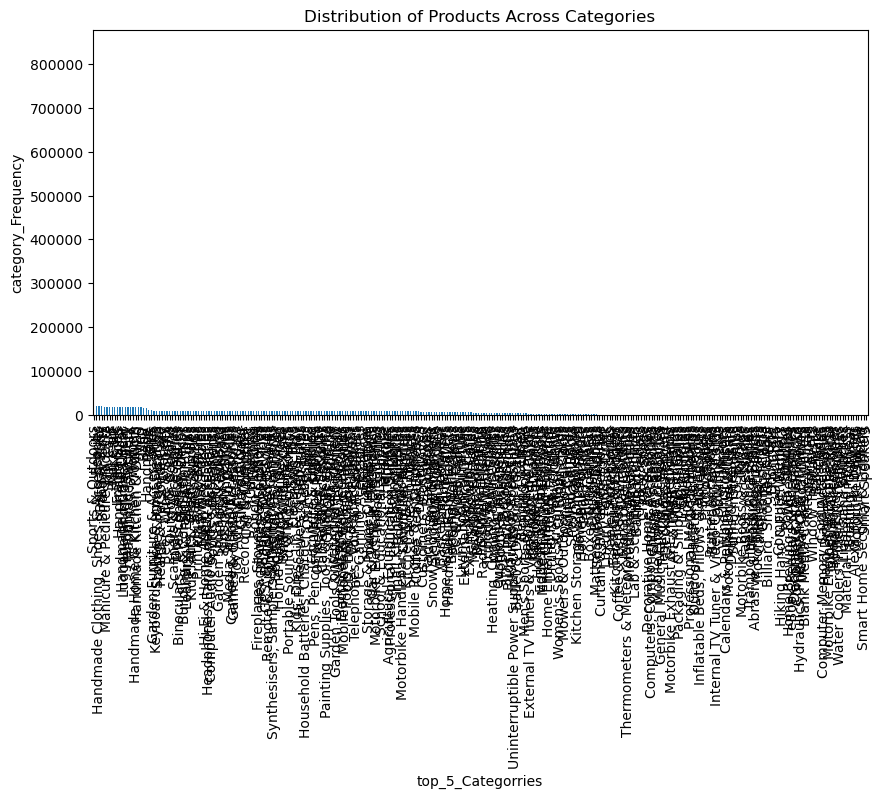

In [53]:
import matplotlib.pyplot as plt

# Bar chart for product categories
plt.figure(figsize=(10, 5))
category_freq.plot(kind='bar')
plt.title('Distribution of Products Across Categories')
plt.xlabel('top_5_Categorries')
plt.ylabel('category_Frequency')
plt.show()


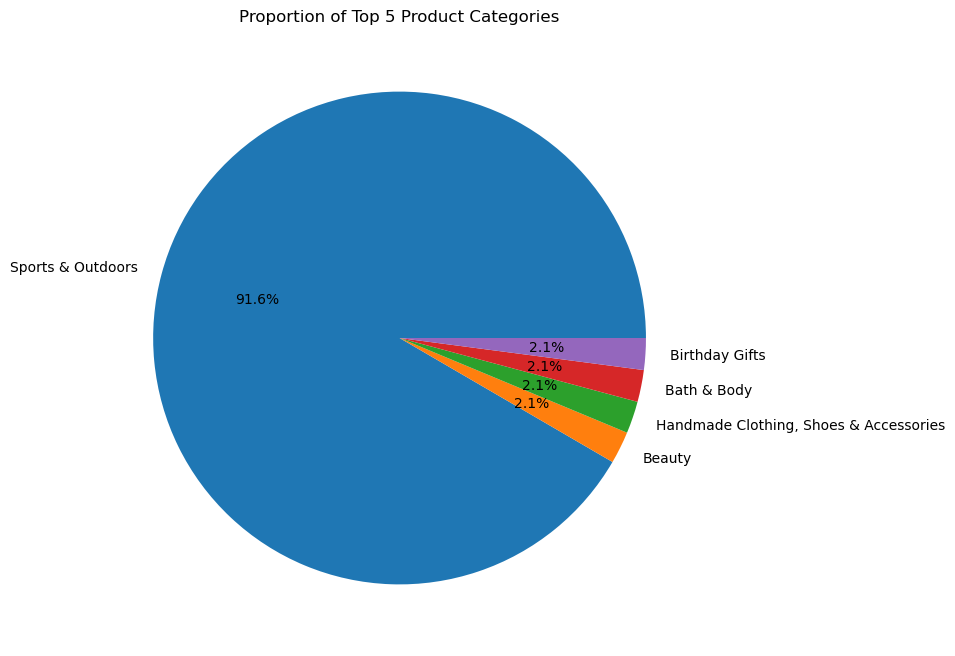

In [54]:
# Pie chart for top 5 categories
plt.figure(figsize=(8, 8))
top_5_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Top 5 Product Categories')
plt.ylabel('')
plt.show()


### Part 2: Delving into Product Pricing

1 Measures of Centrality for Price

In [55]:
# Mean, median, and mode for product prices
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")


Mean Price: 89.24380943985244
Median Price: 19.09
Mode Price: 9.99


2 Measures of Dispersion for Price

In [56]:
# Variance, standard deviation, range, and interquartile range for product prices
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range: {iqr_price}")


Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Range: 100000.0
Interquartile Range: 36.0


## 3 Visualize Price Distribution

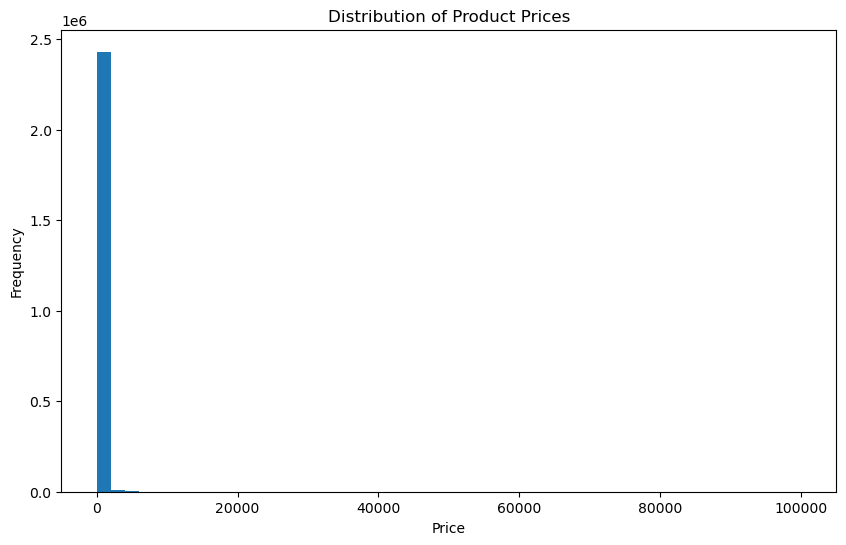

In [57]:
# Histogram for product prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




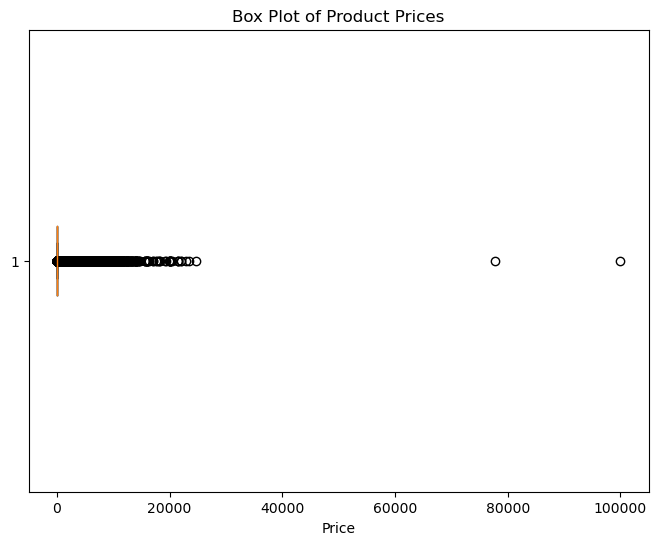

In [58]:
# Box plot for product prices
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

 ## Unpacking Product Ratings

 ## 1 Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [59]:
df.columns = df.columns.str.strip()  # Removes leading and trailing spaces
print(df.columns)


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'product_category'],
      dtype='object')


In [20]:
# Example: if the correct column name is 'product_rating'
df.rename(columns={'stars': 'rating'}, inplace=True)


In [21]:
df.rename 

<bound method DataFrame.rename of              uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  rating  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...     4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...     4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...     4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...     4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...     4.6     1881   
...                                                    ...     ...      ...   
2443646  Motorbike Armour, M

In [22]:
# Rename the column 'product_rating' to 'rating'
df = df.rename(columns={'product_rating': 'rating'})

# Verify that the column has been renamed
print(df.columns)


Index(['uid', 'asin', 'title', 'rating', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'product_category'],
      dtype='object')


2 Measures of Dispersion

In [23]:
# Rename the column 'product_rating' to 'rating'
df = df.rename(columns={'stars': 'rating'})

# Verify the renaming
print(df.columns)


Index(['uid', 'asin', 'title', 'rating', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'product_category'],
      dtype='object')


In [24]:
# Check for columns that might match 'rating' with extra spaces or characters
print([col for col in df.columns if 'rating' in col])


['rating']


In [25]:
df

,uid,asin,title,rating,reviews,price,isBestSeller,boughtInLastMonth,product_category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [26]:
# Check the data type of the 'rating' column
print(df['rating'].dtype)


float64


In [27]:
# Ensure the 'rating' column exists in your DataFrame
if 'rating' in df.columns:
    # Calculate mean, median, and mode for product ratings
    mean_rating = df['rating'].mean()
    median_rating = df['rating'].median()
    mode_rating = df['rating'].mode()[0]

    print(f"Mean Rating: {mean_rating}")
    print(f"Median Rating: {median_rating}")
    print(f"Mode Rating: {mode_rating}")
else:
    print("The 'rating' column is not present in the DataFrame.")


Mean Rating: 2.152836472966905
Median Rating: 0.0
Mode Rating: 0.0


In [28]:
# Check if the 'rating' column exists in the DataFrame
if 'rating' in df.columns:
    # Calculate skewness and kurtosis for product ratings
    from scipy.stats import skew, kurtosis

    skewness_rating = skew(df['rating'].dropna())
    kurtosis_rating = kurtosis(df['rating'].dropna())
    
    print(f"Skewness of Rating: {skewness_rating}")
    print(f"Kurtosis of Rating: {kurtosis_rating}")
else:
    print("The 'rating' column is not present in the DataFrame.")


Skewness of Rating: 0.08120730776283354
Kurtosis of Rating: -1.926004642549839


In [29]:
print(df.columns.tolist())

['uid', 'asin', 'title', 'rating', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'product_category']


In [ ]:
df.get('rating', default="no_rating")

## 3 Shape of the Distribution:

In [30]:

# Calculate skewness and kurtosis for product ratings
skewness_rating = skew(df['rating'])
kurtosis_rating = kurtosis(df['rating'])

print(f"Skewness: {skewness_rating}")
print(f"Kurtosis: {kurtosis_rating}")


Skewness: 0.08120730776283354
Kurtosis: -1.926004642549839


# Visualizations:

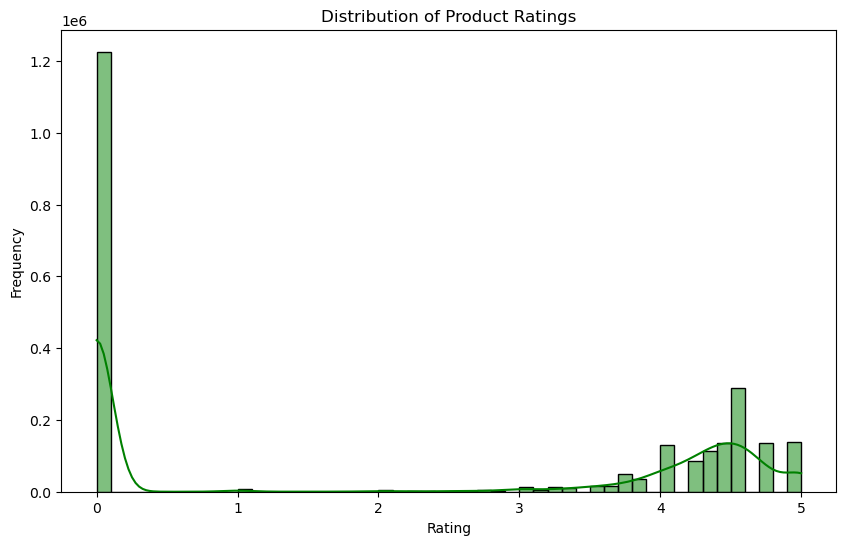

In [31]:
import seaborn as sns

# Histogram for product ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=50, kde=True, color='green')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
